The goal of this notebook is to improve the model by removing features which are introducing colinearity.
This was done by introducing the `drop_first` parameter into the `get_dummies` method, which I did not do in the previous model.  Additionally, I am removing the variables `Pool QC`, `Pool Area`, and `Misc Val`.

# Importing

In [32]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

In [33]:
df = pd.read_csv('datasets/train.csv', keep_default_na=False)

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [34]:
test = pd.read_csv('datasets/test.csv', keep_default_na=False)

In [35]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [36]:
df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NA,NA,NA,NA,NA
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [37]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [38]:
df.isnull().sum().sum()

0

In [39]:
df._get_numeric_data().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [40]:
df.drop(['Id', 'PID'], axis=1, inplace=True)

In [41]:
test_id = test['Id']

In [42]:
test.drop(['Id', 'PID'], axis=1, inplace=True)

In [43]:
df['Lot Shape'] = df['Lot Shape'].map({'IR3': 1, 'IR2': 2, 'IR1' : 3, 'Reg': 4})

df['Utilities'] = df['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa' : 1})

df['Land Slope'] = df['Land Slope'].map({'Sev': 1, 'Mod': 2, 'Gtl' : 1})

df['Exter Qual'] = df['Exter Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Exter Cond'] = df['Exter Cond'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Bsmt Qual'] = df['Bsmt Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

df['Bsmt Cond'] = df['Bsmt Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av' : 3, 'Gd':4})

df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

df['Heating QC'] = df['Heating QC'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd': 4, 'Ex': 5})

df['Electrical'] = df['Electrical'].map({'Mix': 1, 'FuseP': 2, 'FuseF' : 3, 'FuseA':4, 'SBrkr':5})

df['Kitchen Qual'] = df['Kitchen Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Functional'] = df['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2' : 3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

df['Fireplace Qu'] = df['Fireplace Qu'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Garage Finish'] = df['Garage Finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

df['Garage Qual'] = df['Garage Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Garage Cond'] = df['Garage Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

df['Paved Drive'] = df['Paved Drive'].map({'N':1, 'P':2, 'Y':3})

df['Pool QC'] = df['Pool QC'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

In [44]:
test['Lot Shape'] = test['Lot Shape'].map({'IR3': 1, 'IR2': 2, 'IR1' : 3, 'Reg': 4})

test['Utilities'] = test['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa' : 1})

test['Land Slope'] = test['Land Slope'].map({'Sev': 1, 'Mod': 2, 'Gtl' : 1})

test['Exter Qual'] = test['Exter Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Exter Cond'] = test['Exter Cond'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Bsmt Qual'] = test['Bsmt Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test['Bsmt Cond'] = test['Bsmt Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'NA':0, 'No': 1, 'Mn': 2, 'Av' : 3, 'Gd':4})

test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec' : 3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

test['Heating QC'] = test['Heating QC'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd': 4, 'Ex': 5})

test['Electrical'] = test['Electrical'].map({'Mix': 1, 'FuseP': 2, 'FuseF' : 3, 'FuseA':4, 'SBrkr':5})

test['Kitchen Qual'] = test['Kitchen Qual'].map({'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Functional'] = test['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2' : 3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

test['Fireplace Qu'] = test['Fireplace Qu'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Garage Finish'] = test['Garage Finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

test['Garage Qual'] = test['Garage Qual'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Garage Cond'] = test['Garage Cond'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

test['Paved Drive'] = test['Paved Drive'].map({'N':1, 'P':2, 'Y':3})

test['Pool QC'] = test['Pool QC'].map({'NA':0, 'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd':4, 'Ex':5})

In [45]:
df.isnull().sum().sort_values(ascending=False)[:15]

Bsmt Exposure     4
BsmtFin Type 2    2
Garage Finish     1
BsmtFin Type 1    1
Bsmt Cond         1
Bsmt Qual         1
Garage Qual       1
Garage Cond       1
SalePrice         0
Exterior 2nd      0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exter Qual        0
Mas Vnr Type      0
dtype: int64

In [46]:
df.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [47]:
df = pd.get_dummies(df, columns=['Street', 'Sale Type', 'Bldg Type', 'House Style', 'Exterior 1st', 'Central Air'], drop_first=True)
test = pd.get_dummies(test, columns=['Street', 'Sale Type', 'Bldg Type', 'House Style', 'Exterior 1st', 'Central Air'], drop_first=True)


In [48]:
df = df._get_numeric_data()
test = test._get_numeric_data()

In [49]:
df_sp = df['SalePrice']

In [50]:
# Making sure both datasets share the same dummy columns (Thanks to Grace for the code solution)
train_features = [col for col in df.columns if col in test.columns]
test_features = [col for col in test.columns if col in df.columns]

df = df[train_features]
test = test[test_features]

In [51]:
df.shape

(2051, 77)

In [52]:
test.shape

(879, 77)

In [53]:
df['SalePrice'] = df_sp

In [54]:
df.drop(['Pool QC'], axis=1, inplace=True)
test.drop(['Pool QC'], axis=1, inplace=True)

In [55]:
df.columns

Index(['MS SubClass', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'Street_Pave', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ', 'Bldg Type_2fmCon',
       'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
       'Hou

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Lot Shape,2051.0,3.595807,0.566514,1.0,3.0,4.0,4.0,4.0
Utilities,2051.0,2.998537,0.049365,1.0,3.0,3.0,3.0,3.0
Land Slope,2051.0,1.042906,0.202694,1.0,1.0,1.0,1.0,2.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.0,2010.0
Exter Qual,2051.0,3.406143,0.587962,2.0,3.0,3.0,4.0,5.0


In [57]:
df.head().T

,0,1,2,3,4
MS SubClass,60.0,60.0,20.0,60.0,50.0
Lot Area,13517.0,11492.0,7922.0,9802.0,14235.0
Lot Shape,3.0,3.0,4.0,4.0,3.0
Utilities,3.0,3.0,3.0,3.0,3.0
Land Slope,1.0,1.0,1.0,1.0,1.0
Overall Qual,6.0,7.0,5.0,5.0,6.0
Overall Cond,8.0,5.0,7.0,5.0,8.0
Year Built,1976.0,1996.0,1953.0,2006.0,1900.0
Year Remod/Add,2005.0,1997.0,2007.0,2007.0,1993.0
Exter Qual,4.0,4.0,3.0,3.0,3.0


In [58]:
df.isnull().sum().sum()

0

#### Correlation Heat Map

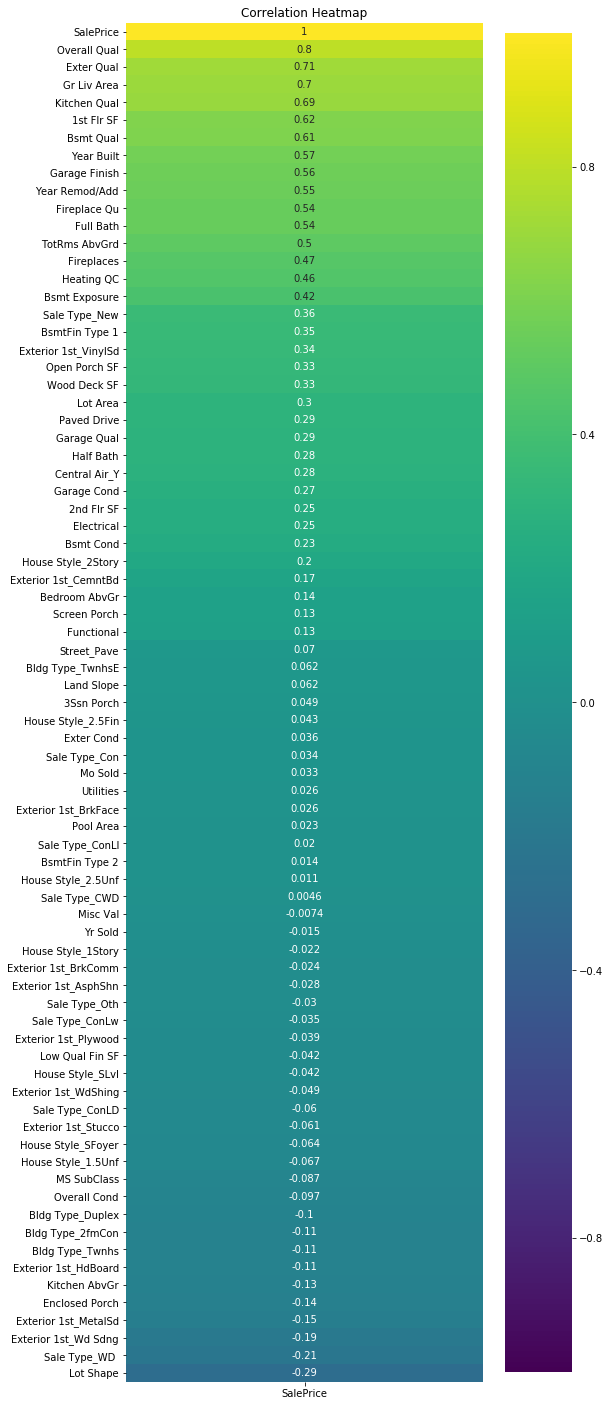

In [59]:
plt.figure(figsize=(8,25))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
           annot=True,
           vmin=-1,
           cmap='viridis')
plt.title('Correlation Heatmap');

Text(0, 0.5, 'Frequency')

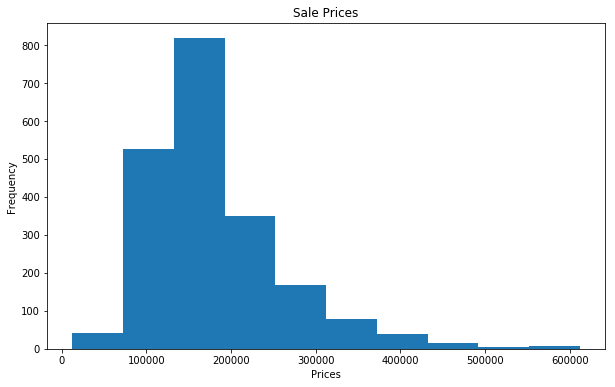

In [60]:
plt.figure(figsize=[10,6])
plt.hist(df['SalePrice'])
plt.title('Sale Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')

#### Train-test splitting

In [61]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV())
])

In [64]:
pipe.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

And it can be scored like any other model object:

In [65]:
pipe.score(X_train, y_train)

0.9122481135954368

In [66]:
pipe.score(X_test, y_test)

0.9076288134458189

In [67]:
pipe.named_steps

{'pf': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lcv': LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
     max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False)}

In [68]:
pipe.named_steps['lcv'].alpha_

1879.9352203095423

In [69]:
min(pipe.named_steps['lcv'].alphas_)

66.00813006410769

In [70]:
max(pipe.named_steps['lcv'].alphas_)

66008.13006410773

Optimizing Alpha

In [71]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(alphas=np.linspace(1700, 2100, 100)))
])

In [85]:
pipe.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=array([1700.    , 1704.0404, ..., 2095.9596, 2100.    ]),
    copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [86]:
pipe.named_steps['lcv'].alpha_

1805.050505050505

In [87]:
pipe.score(X_train, y_train)

0.9131057892344634

In [88]:
pipe.score(X_test, y_test)

0.9079474525576342

Coefficients

In [89]:
len(pipe.named_steps['lcv'].coef_)

3003

In [90]:
# how many have been zeroed out?
sum(pipe.named_steps['lcv'].coef_ == 0)/len(pipe.named_steps['lcv'].coef_)

0.9766899766899767

In [91]:
# remaining features
len(pipe.named_steps['lcv'].coef_) - (sum(pipe.named_steps['lcv'].coef_ == 0)/len(pipe.named_steps['lcv'].coef_) * len(pipe.named_steps['lcv'].coef_))

70.0

In [92]:
coef_df = pd.DataFrame({
    'coefs': pipe.named_steps['pf'].get_feature_names(X.columns),
    'vals': pipe.named_steps['lcv'].coef_
})
coef_df['abs'] = coef_df['vals'].map(lambda x: abs(x))
coef_df.sort_values(by='abs', ascending=False).drop('abs', axis=1).head(30)

,coefs,vals
463,Overall Qual Gr Liv Area,19313.117096
2347,Pool Area Sale Type_New,-14707.160753
2382,Misc Val Sale Type_New,-13646.172885
468,Overall Qual Kitchen Qual,9609.956578
734,Exter Qual 1st Flr SF,5846.950939
1178,Heating QC Gr Liv Area,5317.651143
861,Bsmt Qual BsmtFin Type 1,4624.698129
460,Overall Qual 1st Flr SF,4458.809914
865,Bsmt Qual 1st Flr SF,3755.505073
1468,Gr Liv Area Kitchen Qual,3479.362137


#### Gridsearch

In [93]:
pipe = Pipeline([
    ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lcv', LassoCV(alphas=np.linspace(1700, 2100, 100)))
])

In [97]:
params = {
    'pf__interaction_only': [True, False]
}

In [98]:
gs = GridSearchCV(pipe, params)

In [99]:
gs.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pf', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=array([1700.    , 1704.0404, ..., 2095.9596, 2100.    ]),
    copy_X=True, cv='warn', ...lse,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pf__interaction_only': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
gs.best_params_

{'pf__interaction_only': False}

In [101]:
gs.score(X_train, y_train)

0.9131057892344634

In [102]:
gs.score(X_test, y_test)

0.9079474525576342

In [103]:
gs.best_estimator_.named_steps['lcv'].alpha_

1805.050505050505

In [104]:
gs_predict = gs.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
# RMSE
np.sqrt(mean_squared_error(y_test, gs_predict))

23774.0387352306

(array([ 14.,  90., 138.,  94.,  78.,  37.,  31.,  22.,   4.,   5.]),
 array([ 44846.74136496,  83950.75964713, 123054.77792931, 162158.79621149,
        201262.81449367, 240366.83277584, 279470.85105802, 318574.8693402 ,
        357678.88762238, 396782.90590455, 435886.92418673]),
 <a list of 10 Patch objects>)

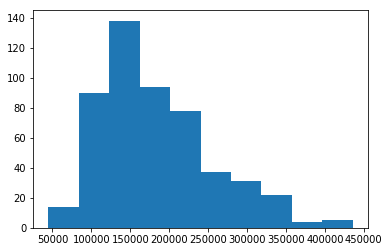

In [115]:
plt.hist(gs_predict)

In [112]:
# residuals
(sum(gs_predict - y_test))

753622.7083416436

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Predicted Sale Price')

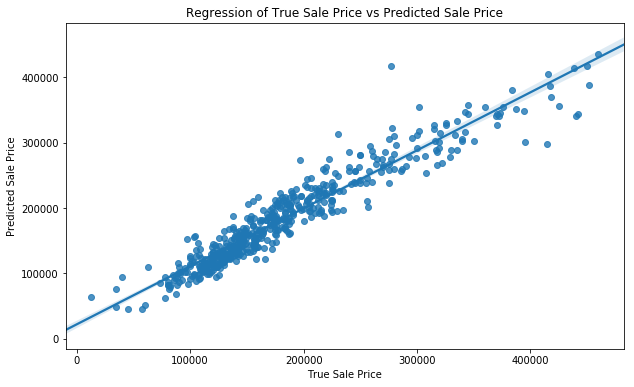

In [116]:
plt.figure(figsize=[10,6])
sns.regplot(x=y_test, y=gs_predict)
plt.title('Regression of True Sale Price vs Predicted Sale Price')
plt.xlabel('True Sale Price')
plt.ylabel('Predicted Sale Price')

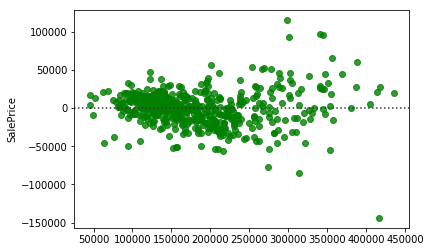

In [114]:
sns.residplot(gs_predict, y_test, color="g")

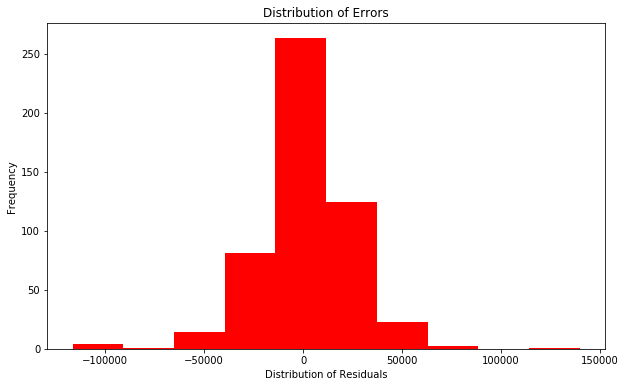

In [119]:
plt.figure(figsize=[10,6])
plt.hist((gs_predict - y_test), color='red')
plt.title('Distribution of Errors')
plt.xlabel('Distribution of Residuals')
plt.ylabel('Frequency');

In [ ]:
# Number of features
len(gs.best_estimator_.named_steps['pf'].get_feature_names(X.columns))

In [ ]:
# Proportion of zeroed out features
sum(gs.best_estimator_.named_steps['lcv'].coef_ == 0)/len(gs.best_estimator_.named_steps['pf'].get_feature_names(X.columns))


### Generating Predictions

In [ ]:
test.head()

In [ ]:
test_X = test[X.columns]

In [ ]:
preds = gs.predict(test_X)

In [ ]:
preds.shape

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df['SalePrice']

In [ ]:
len('preds')

In [235]:
from datetime import datetime

In [236]:
test['Id'] = test_id

In [237]:
timestamp = str(datetime.now()).split('.')[0]

to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})

to_submit.to_csv(f'my_submission_{timestamp}.csv', index=False)

## Conclusions and Recommendations

The models were able to predict housing prices extremely well with an R^2 score of ~91%, meaning that approximately 91% of the variance can be explained by the model in comparison to our null (baseline).

Additionally, the model has an Root-Mean-Squared Error (RMSE) score of 23,774.03, which means that on average the predictions varied from the true values by $23,774 (punished by outliers).

Overall, the models performed extremely well, but there is certainly room for improvement.  Given more time or resources, I would want to collect more data during different time periods.  This housing data is centered around the housing market crash, which very likely had a large impact on the housing prices.  I would also like to  collect data on the current market, in order to see how the models would perform against future/unseen data.  

Finally, I would take another pass at this data using non-linear regression models or by performing a log transformation on the sale prices of the training data, as I believe that would improve the performance of these models.

I also believe that removing the `Misc. Val` feature was a mistake, and I would find ways to include it in future models